In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 輸送方程式
$$
\frac{dq}{dt} = c \frac{dq}{dx}
$$
cは輸送速度と呼ばれる。
### 以下は輸送速度が正の場合


### 中心差分の導出
\begin{align}
q(x+\Delta x) = q(x) + \frac{q^{(1)}(x)}{1!}\Delta x + \frac{q^{(2)}(x)}{2!}\Delta x^2 + \frac{q^{(3)}(x)}{3!}\Delta x^3
\end{align}
を使って、
\begin{align}
    q_{j+1} = q_j + \Delta \frac{\partial q}{\partial x} + \frac{1}{2}(\Delta x)^2 \frac{\partial^2 q}{\partial x^2} +  \frac{1}{6}(\Delta x)^3 \frac{\partial^3 q}{\partial x^3} \\
        q_{j-1} = q_j - \Delta \frac{\partial q}{\partial x} + \frac{1}{2}(\Delta x)^2 \frac{\partial^2 q}{\partial x^2} -  \frac{1}{6}(\Delta x)^3 \frac{\partial^3 q}{\partial x^3} 
\end{align}
２つの差を取って、
\begin{equation}
    \frac{\partial q}{\partial x} = \frac{q_{j+1} - q_{j-1}}{2\Delta x} + O(\Delta x^2)
\end{equation}
これを中心差分という。

### FTCS法
時間：陽解法、空間：中心差分

In [10]:
c = 1
dt = 0.05
dx = 0.1
jmax = 21
nmax = 6
x = np.linspace(0, dx * (jmax - 1), jmax)
q = np.zeros(jmax)

for j in range(jmax):
    if(j<jmax/2):
        q[j] = 1
    else:
        q[j] = 0

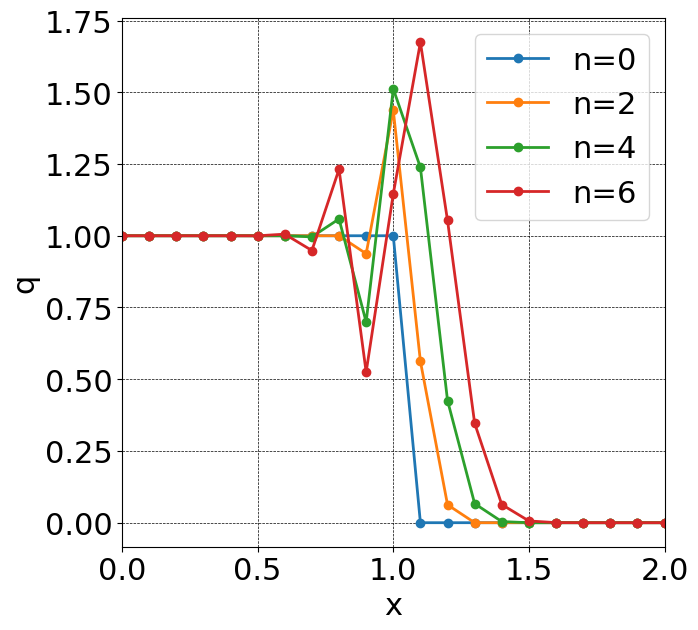

In [11]:
plt.figure(figsize=(7,7),dpi=100)
plt.rcParams["font.size"] = 22

plt.plot(x,q,marker='o',lw=2,label='n=0')

for n in range(1, nmax+1):
    qold = q.copy()
    for j in range(1, jmax - 1):
        q[j] = qold[j] - dt * c* (qold[j+1]-qold[j-1])/(2*dx)
    if n%2 == 0:
        plt.plot(x,q,marker='o',lw=2,label=f'n={n}')
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
plt.xlim([0, 2.0])
plt.xlabel('x')
plt.ylabel('q')
plt.legend()
plt.show()

## 空間微分に一次精度風上差分を使う